## Tasksdescription:

- Create a new model with the formula 𝑤2 ⋅ 𝑡𝑢^2 + 𝑤1 ⋅ 𝑡𝑢 + 𝑏
- Adjust the training loop accordingly and perform the perform the training again
- Did the "loss" get bigger or smaller with the new model?
- Does the result look better or worse with the new model?
- Plot the progression of the loss over 5000 epochs of training with the new and old model in a graph.

## Implementation:

In [159]:
# import necessary packages
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

In [160]:
# import the data from the given file and store them under the variables t_u and t_c
values = np.loadtxt('vl5_data.csv')
t_u = torch.tensor(values[:,1])
t_c = torch.tensor(values[:,0])

In [161]:
# norminate the t_u and create tensors with starting values for w (slope) and b (y-intercept)
t_un = 0.1 * t_u
new_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True) # [w1, w2, b]
old_params = torch.tensor([1.0, 0.0], requires_grad=True) # [w, b]

In [162]:
# define the new model and give the old model for reference
def new_model(t_u, params):
    [w1, w2, b] = params
    t_p = w2 * pow(t_u, 2) + w1 * t_u + b
    return t_p

def old_model(t_u, params):
    [w, b] = params
    t_p = w*t_u + b
    return t_p

In [163]:
# define the loss function
def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

# define the training_loop
# distinguish between the old_params and new_params by looking at the size of the tensor
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    train_loss_list = []
    val_loss_list = []
    for epoch in range(1, n_epochs + 1):
        if params.size(dim=0) == 3:
            train_t_p = new_model(train_t_u, params)
        else:
            train_t_p = old_model(train_t_u, params)
        train_loss = loss_fn(train_t_p, train_t_c)
        train_loss_list.append(round(train_loss.item(), 4))
        with torch.no_grad():
            if params.size(dim=0) == 3:
                val_t_p = new_model(val_t_u, params)
            else:
                val_t_p = old_model(val_t_u, params)
            val_loss = loss_fn(val_t_p, val_t_c)
            val_loss_list.append(round(val_loss.item(), 4))
            assert val_loss.requires_grad == False #Checks that our output requires_grad args are forced to False inside this block
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch % 500 == 0:
            # print the training and validation loss for the first 3 epochs and after that only for epoche 500, 1000, 1500, 2000, ...
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")
    return train_loss_list, val_loss_list

In [164]:
# divide the data set into training and test data
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
print(f'gesamtanzahl = {n_samples}, validierungsanzahl = {n_val}')

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices)
print(val_indices)

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

# normalization
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

gesamtanzahl = 11, validierungsanzahl = 2
tensor([6, 7, 8, 0, 2, 3, 9, 4, 1])
tensor([10,  5])


In [165]:
# enter the parameters for adjusting the training loop
learning_rate = 1e-1
n_epochs = 5000

In [166]:
# define a function to plot the results from the models
def plot_model(t_u, t_c, t_p, name_of_model):
    plt.plot(t_u, t_c, 'x')
    plt.plot(t_u, t_p.detach().numpy())
    plt.title(name_of_model)
    plt.xlabel(f"Temperature (Fahrenheit)"
           f"\nPlot of {name_of_model} (solid line) versus the input data (x)")
    plt.ylabel("Temperature (Celsius)")
    plt.grid()

Epoch 1, Training loss 74.8700, Validation loss 105.0889
Epoch 2, Training loss 67.3489, Validation loss 92.6364
Epoch 3, Training loss 60.6364, Validation loss 81.1910
Epoch 500, Training loss 3.1633, Validation loss 2.3308
Epoch 1000, Training loss 3.1536, Validation loss 2.1562
Epoch 1500, Training loss 3.1536, Validation loss 2.1562
Epoch 2000, Training loss 3.1536, Validation loss 2.1562
Epoch 2500, Training loss 3.1536, Validation loss 2.1562
Epoch 3000, Training loss 3.1536, Validation loss 2.1562
Epoch 3500, Training loss 3.1536, Validation loss 2.1562
Epoch 4000, Training loss 3.1536, Validation loss 2.1562
Epoch 4500, Training loss 3.1536, Validation loss 2.1562
Epoch 5000, Training loss 3.1536, Validation loss 2.1562


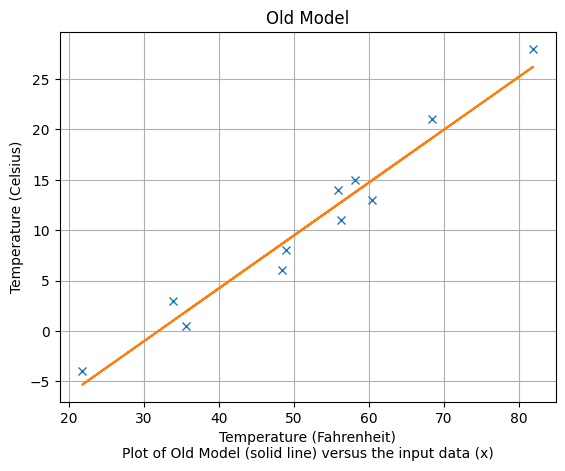

In [167]:
# OLD Model
params = old_params
optimizer = optim.Adam([params], lr=learning_rate)
old_train_loss , old_val_loss = training_loop(n_epochs, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
t_p = old_model(t_un, params)
plot_model(t_u, t_c, t_p, "Old Model")

Epoch 1, Training loss 659.6198, Validation loss 748.5786
Epoch 2, Training loss 475.5853, Validation loss 527.7252
Epoch 3, Training loss 323.1510, Validation loss 346.8531
Epoch 500, Training loss 3.0027, Validation loss 2.0301
Epoch 1000, Training loss 2.6370, Validation loss 1.8811
Epoch 1500, Training loss 2.3952, Validation loss 1.7626
Epoch 2000, Training loss 2.2910, Validation loss 1.6914
Epoch 2500, Training loss 2.2622, Validation loss 1.6567
Epoch 3000, Training loss 2.2574, Validation loss 1.6430
Epoch 3500, Training loss 2.2570, Validation loss 1.6388
Epoch 4000, Training loss 2.2570, Validation loss 1.6379
Epoch 4500, Training loss 2.2570, Validation loss 1.6378
Epoch 5000, Training loss 2.2570, Validation loss 1.6378


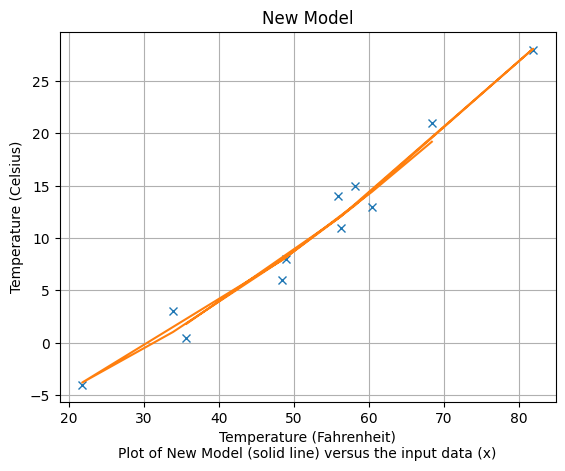

In [168]:
# NEW model
params = new_params
optimizer = optim.Adam([params], lr=learning_rate)
new_train_loss, new_val_loss = training_loop(n_epochs, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
t_p = new_model(t_un, params)
plot_model(t_u, t_c, t_p, "New Model")

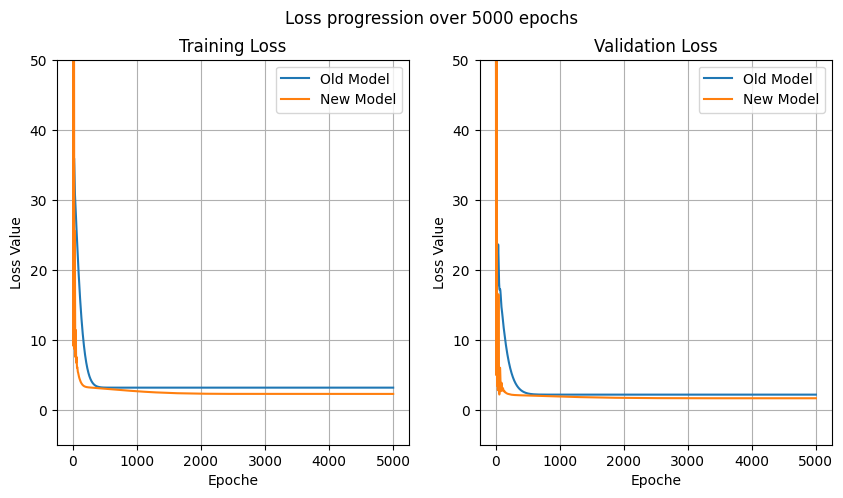

In [172]:
# plot the loss progression of the new model for the training data and validation data in comparison to the old model
def plot_loss(loss_list_new, loss_list_old, title):
    epochs_list = list(range(1, n_epochs+1))
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    for i in range(2):
        ax[i].plot(epochs_list, loss_list_old[i], label="Old Model")
        ax[i].plot(epochs_list, loss_list_new[i], label="New Model")
        ax[i].legend()
        ax[i].set_title(title[i])
        ax[i].set_xlabel("Epoche")
        ax[i].set_ylabel("Loss Value")
        ax[i].grid()
        ax[i].set_ylim(-5, 50);
    fig.suptitle("Loss progression over 5000 epochs")
    plt.show()

loss_list_old = [old_train_loss, old_val_loss]
loss_list_new = [new_train_loss, new_val_loss]
title = ["Training Loss", "Validation Loss"]
plot_loss(loss_list_new, loss_list_old, title)